# CS549-02 Machine Learning Spring 2024: Irfan Khan
# Assignment 2: Linear Regression


**Total: 10 points**

In this assignment, you will solve a linear regression problem using both the normal equation method and the gradient descent method.

Once you have obtained the solution, you will be able to predict the output for new data.


---

## Overview
Suppose you are responsible for advertizing for a company. You need a method to predict increase in revenue as a function
of money spent on advertisement. So, if you want to request a certain advertisement budget, you would like to show
a prediction of the revenue increase with the requested advertisement budget.

You have collected sample data from past in an excel file A2data that contains two columns. Column A contains the money spent
on advertisement in thousands of dollars. Column B contains the increase in revenue in thousands of dollars. Note that there are some outliers in the data where the revenue decreased even with an increase of advertisement dollars.

The task is to build a linear regression model that predicts the increase in revenue as a function of advertisement dollars sepnt. 
- Task 1) Train the model using Normal Equation method.
- Task 2) Train the model using Gradient Descent method.
- Task 3) Look at the convergence impact for different learning rates for Gradient Descent $\alpha$s. 



---

## Import packages

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv # Used for computing the inverse of matrix



## 1 (2 point)

Load data from the A2data spreadsheet into a NumPy array. Visualize data in a scatter plot

shape of original data: (97, 2)


Text(0, 0.5, 'Increase in Revenue 100s of $')

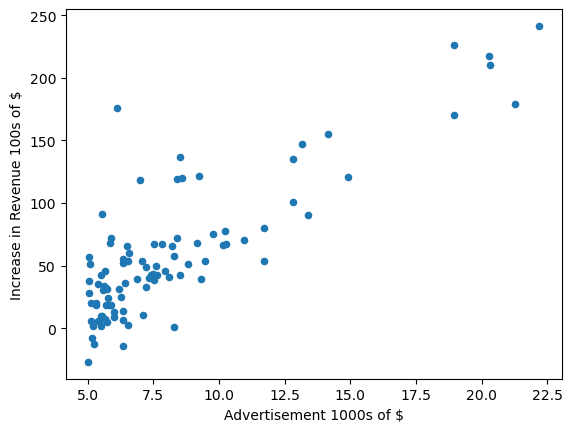

In [37]:
# Load data 

# Load data from Excel into a pandas DataFrame
df = pd.read_excel('A2data.xlsx')

# Extract the two columns and convert them to a NumPy array
data = df[['x', 'y']].to_numpy()

print('shape of original data:', data.shape) # Check if data is 97 by 2


#Start your code

#It is a good idea to visualize data on a scatter plot, if possible. Here we can.
#Plot original data
fig, sp = plt.subplots()
df.plot(kind='scatter',x='x',y='y', ax=sp)
sp.set_xlabel('Advertisement 1000s of $')
sp.set_ylabel('Increase in Revenue 100s of $')


#End your code






# Expected Output

shape of original data: (97, 2)<br>

<img src="A2image1.png">


---
## 2 (4 points)

Implement the Normal Equation method for linear regression: $\theta = (X'^T X')^{-1}X'^T y$

Use the learned $\theta$ to make predictions: $\hat{y} = X'\theta$

Compute the residual sum of squares of the model: $RSS = \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

Draw the straight line representing linear regression on the scatter plot

Compute predicted revenue increase for an $18000 advertisement budget

Theta obtained from normal equation: [-38.95780878  11.93033644]
Residual sum of squares (RSS):  86853.24469391846
Predicted increase in revenue with $18000 advertisement budget: $ 175788.25


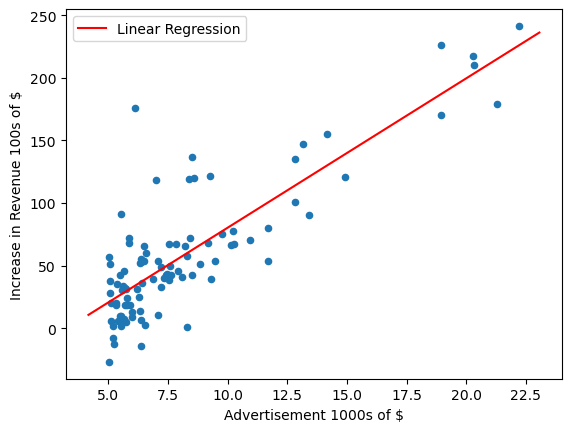

In [38]:
# Create matrix Xprime and y
# Xprime has two columns: 
#   - The first column contain all 1s, which is for the intercept
#   - The second column contains features, i.e., the 1st column of data_norm
#   - y has one column, i.e., the 2nd column of data_norm

Xprime = np.ones_like(data)

Xprime[:,1] = data[:, 0]
y = data[:,-1]

# Normalize data - better for convergence


#### START YOUR CODE ####


term1 = np.linalg.inv(np.dot(Xprime.T,Xprime))  # inv(Xt*X)
term2 = np.dot(term1,Xprime.T) 
theta_method1 = np.dot(term2,y)
w = theta_method1[1]
b = theta_method1[0]

# Compute theta_method1 using normal equation method
# Hint: use the inv() function imported from numpy.linalg


# Use the theta obtained to make predictions and compute the residuals
# Hint: use numpy.dot() and numpy.sum(), and avoid using for loops
#Compute "y_hat"
y_hat = np.dot(Xprime,theta_method1)


# Compute residuals "RSS1"
RSS1 = np.sum((y_hat - y)**2)


#Predict increase in revenue with $18000 advertisement budget, "y_pred"
y_pred = b + w * 18
#Draw a straightline representing linear regression on the scatter plot with sample data
fig, sp = plt.subplots()
df.plot(kind='scatter', x='x', y='y', ax=sp)
sp.set_xlabel('Advertisement 1000s of $')
sp.set_ylabel('Increase in Revenue 100s of $')

linX = np.array(sp.get_xlim())
linY = w * linX + b
sp.plot(linX, linY, color='Red', label='Linear Regression')
sp.legend()
#### END YOUR CODE ####


#### DO NOT CHANGE THE CODE BELOW ####
print('Theta obtained from normal equation:', theta_method1)
print('Residual sum of squares (RSS): ', RSS1)
print ('Predicted increase in revenue with $18000 advertisement budget: $', round(y_pred*1000,2))






# Expected Output

<img src="A2image2.png">

Theta obtained from normal equation: [-38.95780878  11.93033644]<br>
Residual sum of squares (RSS):  86853.24469391846<br>
Predicted increase in revenue with $\$18000$ advertisement budget is $\$175788.25$

## 3 (4 points)

Implement the Gradient Descent method for linear regression with one feature.

The cost function: $J(b, w) = \frac{1}{2m}\sum_i (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_i (b + w x_1^{(i)}-y^{(i)})^2$

Gradients w.r.t. parameters: $\frac{\partial J}{\partial \theta} = \begin{cases}\frac{\partial J}{\partial b}\\ \frac{\partial J}{\partial w}\\ \end{cases} = \begin{cases}\frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_1^{(i)}\\\end{cases}$

The formula to update parameters at each iteration: $\theta := \theta - \alpha * \frac{\partial J}{\partial \theta}$

Note that $X$, $y$, and $\theta$ are all vectors (numpy arrays), and thus the operations above should be implemented in a vectorized fashion. Use `numpy.sum()`, `numpy.dot()` and other vectorized functions, and avoid writing `for` loops in Python.

In [41]:
# Define the gradientDescent function
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    Params
        X - Shape: (m,2); m is the number of data examples
        y - Shape: (m,)
        theta - Shape: (2,)
        num_iters - Maximum number of iterations
    Return
        A tuple: (theta, RSS, cost_array)
        theta - the learned model parameters
        RSS - residual sum of squares
        cost_array - stores the cost value of each iteration. Its shape is (num_iters,)
    '''
    m = len(y)
    cost_array = np.zeros(num_iters)

    for i in range(0, num_iters):
        #### START YOUR CODE ####
        # Make predictions
        # Shape of y_hat: m by 1
        y_hat = np.dot(X,theta)
        
        # Compute the difference between prediction (y_hat) and ground truth label (y)
        diff = y_hat - y

        # Compute the cost
        # Hint: Use the diff computed above
        cost = np.sum(diff**2) / (2*m)
        cost_array[i] = cost
        

        # Compute gradients
        # Hint: Use the diff computed above
        # Hint: Shape of gradients is the same as theta
        gradients = np.dot(X.T, diff) / m
       

        # Update theta
        theta = theta - alpha * gradients
        #### END YOUR CODE ####
    
    # Compute residuals
    # Hint: Should use the same code as in #2 above
    #### START YOUR CODE ####
    y_hat_final = np.dot(X,theta)
    RSS = np.sum((y_hat_final - y) ** 2)
    
    #### END YOUR CODE ####

    return theta, RSS, cost_array

In [42]:
# This cell is to evaluate the gradientDescent function implemented above

#### DO NOT CHANGE THE CODE BELOW ####
# Define learning rate and maximum iteration number
ALPHA = 0.01
MAX_ITER = 5000

# Initialize theta to [0,0]
theta = np.zeros(2)
theta_method2, RSS2, cost_array = gradientDescent(Xprime, y, theta, ALPHA, MAX_ITER)

print('Theta obtained from gradient descent:', theta_method2)
print('Residual sum of squares (RSS): ', RSS2)

Theta obtained from gradient descent: [-38.95300511  11.92985386]
Residual sum of squares (RSS):  86853.24510146641


# Expected Output

Theta obtained from gradient descent: [-38.95300511  11.92985386]<br>
Residual sum of squares (RSS):  86853.24510146641<br>
Check to see that the result is the close to that obtained via normal equation method


## 4


Plot the cost against iteration number. This is a common method of examining the performance of gradient descent.

Try different values of learning rate, e.g., $\alpha=\{0.01, 0.005, 0.05\}$, and see how the cost curves change. 

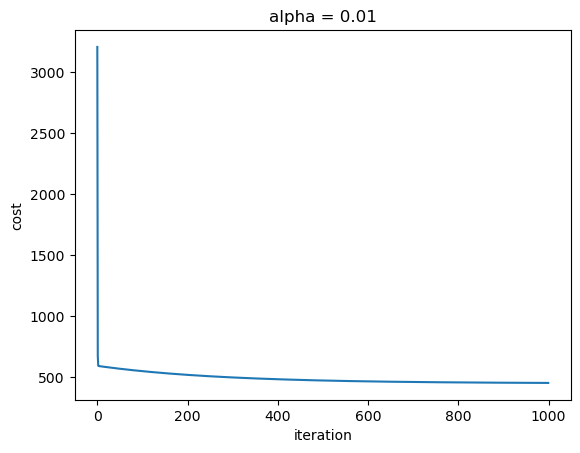

In [43]:
alpha = 0.01
MAX_ITER = 1000
theta = np.zeros(2)

_, _, cost_array = gradientDescent(Xprime, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

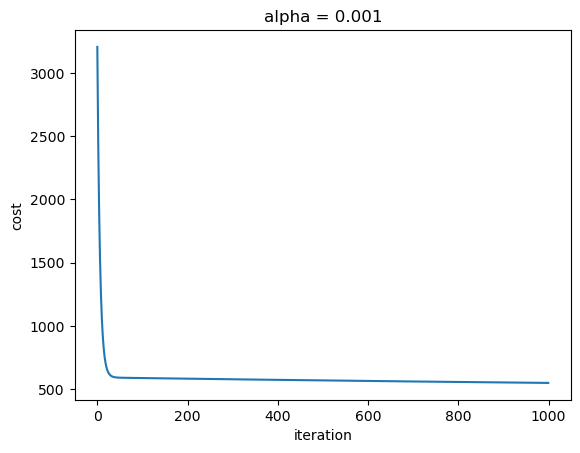

In [44]:
alpha = 0.001
MAX_ITER = 1000
theta = np.zeros(2)
_, _, cost_array = gradientDescent(Xprime, y, theta, alpha, MAX_ITER)


plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

c:\Users\bryce\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\bryce\AppData\Local\Temp\ipykernel_26148\3376136599.py:29: RuntimeWarning: overflow encountered in square
  cost = np.sum(diff**2) / (2*m)
C:\Users\bryce\AppData\Local\Temp\ipykernel_26148\3376136599.py:40: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradients


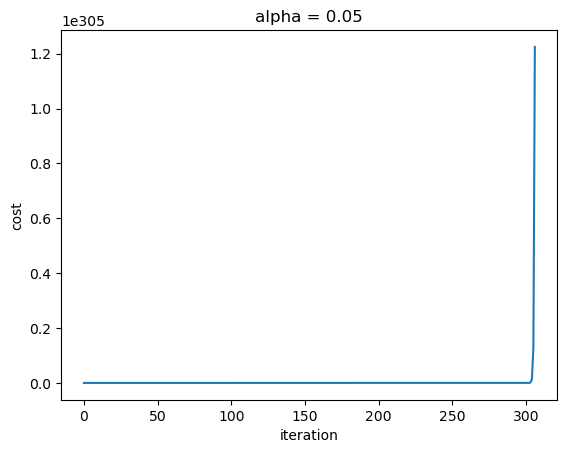

In [45]:
alpha = 0.05
MAX_ITER = 1000
theta = np.zeros(2)
_, _, cost_array = gradientDescent(Xprime, y, theta, alpha, MAX_ITER)


plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

Note that with smaller $\alpha$, convergence is slower. At iteration 1000, for $\alpha = 0.01$, cost is <500 but for $\alpha = 0.001$, cost is > 500. Too large an alpha may result in no convergence as shown above for $\alpha= 0.05$